# Feature Selection Methods.

>1. Univariate selection.
2. Feature Importance. 
3. Correlation matrix with heatmap.

# Goal
he goal of feature selection in machine learning is to find __best__ set of features that allows one to build useful models of studied phenomena.

## Note : 
I have prepared a model by selecting all the features and I got an accuracy of around 65% which is not pretty good for a predictive model and after doing some feature selection and feature engineering without doing any logical changes in my model code my __accuracy__ jumped to __81%__ which is quite impressive !!
### Import dataset & Libraries :

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mobile_train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.shape

(2000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 1. Univariate Selection.
> * Below I'm using chi-squared (chi²) statistical test for non negative numbers to select 10 features from the mobile price range prediction dataset.
> * The scikit-learn library provides the __SelectKBest__ class that can be used with a suite of different statistical tests to select a specific number of features.

In [5]:
from sklearn.feature_selection import chi2, SelectKBest

# Separate inputs/independent & target variables :
X = data.iloc[:,0:20]       # All input variables.
y = data.iloc[:,-1]         # target i.e price_range

# Applying SelectKBest to get top 10 important/best features :
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)       # fit.

dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualzation :
featureScores = pd.concat([dfcolumns, round(dfscore,3)], axis=1)
featureScores.columns = ['Specs', 'Score']

# Print top 10 best feature scores:
print(featureScores.nlargest(10,'Score'))

            Specs       Score
13            ram  931267.519
11      px_height   17363.570
0   battery_power   14129.867
12       px_width    9810.587
8       mobile_wt      95.973
6      int_memory      89.839
15           sc_w      16.480
16      talk_time      13.236
4              fc      10.135
14           sc_h       9.615


## 2. Feature Importance.
> * You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
>* Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
>* Feature importance is an inbuilt class that comes with __Tree Based Classifiers__, we will be using __Extra Tree Classifier__ for extracting the top 10 features for the dataset.

In [6]:
data = pd.read_csv('mobile_train.csv')

In [7]:
X_ = data.iloc[:, 0:20]          # Input variables 
y_ = data.iloc[:, -1]            # Target variable

[0.05928431 0.02024097 0.03448749 0.02017306 0.03342949 0.01854561
 0.03609838 0.03490027 0.03768727 0.03499124 0.03409137 0.04642043
 0.04881777 0.37962179 0.03483766 0.03567612 0.03649728 0.01476138
 0.01924734 0.02019077]


<Figure size 792x432 with 0 Axes>

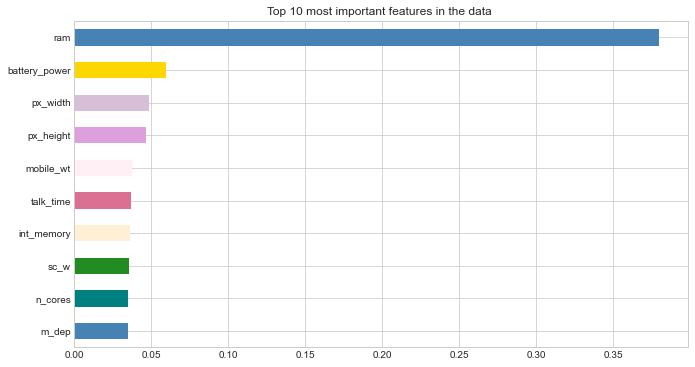

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_, y)
print(model.feature_importances_)

# Plotting the graph to get nice visualization :
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(11,6))
feat_importances = pd.Series(model.feature_importances_, index = X_.columns)

feat_importances.nlargest(10).sort_values().plot(kind='barh',color=['steelblue','teal','forestgreen','papayawhip',
                                                                    'palevioletred',
                                                                    'lavenderblush','plum','thistle','gold'])
plt.title('Top 10 most important features in the data ')
plt.show()

## 3. Correlation matrix with heatmap.
> * Correlation states how the features are related to each other or the target variable.
> * Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
> * Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

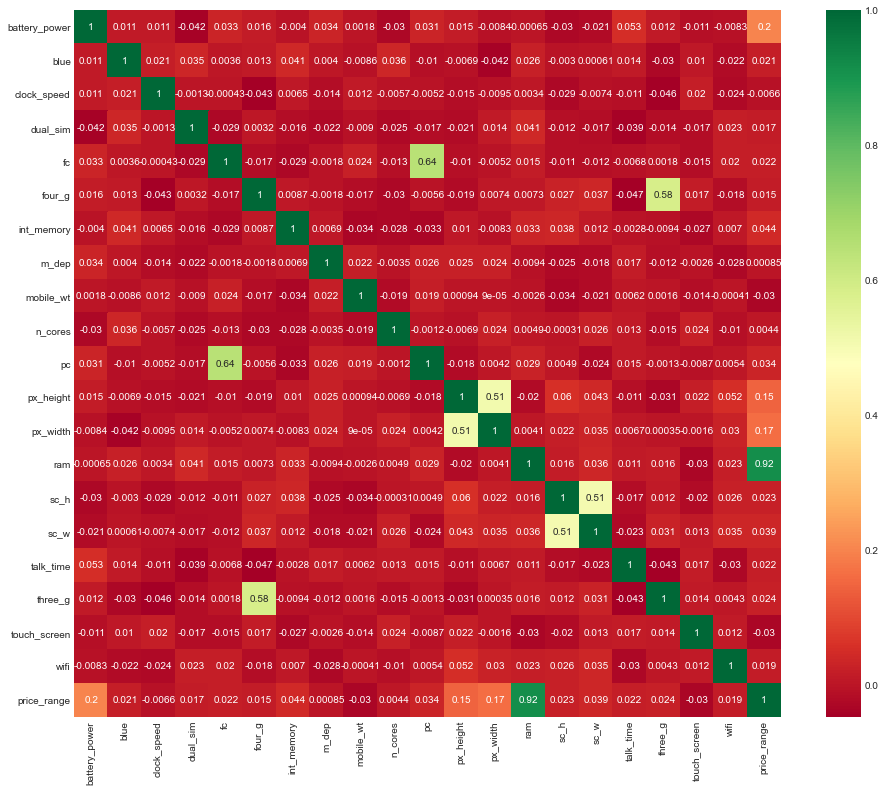

In [9]:
import seaborn as sns

X_new = data.iloc[:, 0:20]      # inputs/independet variables
y_new = data.iloc[:, -1]        # target variable

# get correlations of each features from the dataset :
corr_mat = data.corr()
top_corr_features = corr_mat.index

# visualization :
plt.figure(figsize=(16,13))
heat = sns.heatmap(data[top_corr_features].corr(), square=True, annot = True, cmap = 'RdYlGn')
plt.show()

## Insights:
Have a look at the last row i.e price range, see how the price range is correlated with other features, ram is the highly correlated with price range followed by battery power, pixel height and width while m_dep, clock_speed and n_cores seems to be least correlated with price_range.
Hence we have discovered how to select relevant features from data using Univariate Selection technique, feature importance and correlation matrix.